In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
fruits = pd.read_table('fruit.txt', sep='\t', na_values=['?','.'])

In [3]:
fruits = fruits.fillna(fruits.mean())

In [4]:
fruits.head(2)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,apple,granny_smith,180.0,8.0,6.8,0.59


In [5]:
fruits['mass']

0     192.000000
1     180.000000
2     176.000000
3     164.448276
4      84.000000
5      80.000000
6      80.000000
7      76.000000
8     178.000000
9     172.000000
10    166.000000
11    172.000000
12    154.000000
13    164.000000
14    152.000000
15    156.000000
16    156.000000
17    168.000000
18    162.000000
19    162.000000
20    160.000000
21    156.000000
22    140.000000
23    170.000000
24    342.000000
25    356.000000
26    362.000000
27    204.000000
28    140.000000
29    160.000000
30    158.000000
31    210.000000
32    164.000000
33    190.000000
34    142.000000
35    150.000000
36    160.000000
37    154.000000
38    158.000000
39    144.000000
40    154.000000
41    180.000000
42    154.000000
43    194.000000
44    200.000000
45    186.000000
46    216.000000
47    196.000000
48    174.000000
49    132.000000
50    130.000000
51    116.000000
52    118.000000
53    120.000000
54    116.000000
55    116.000000
56    116.000000
57    152.000000
58    118.0000

In [6]:
fruits[:3]

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,apple,granny_smith,180.0,8.0,6.8,0.59
2,1,apple,granny_smith,176.0,7.4,7.2,0.60


In [7]:
fruits['mass'][:3]

0    192.0
1    180.0
2    176.0
Name: mass, dtype: float64

In [8]:
freq = fruits['fruit_name'].value_counts()

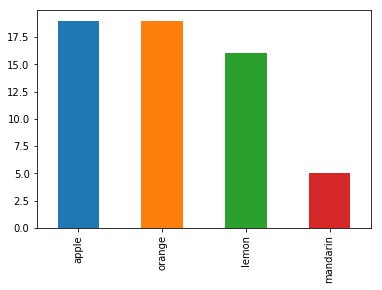

In [9]:
freq.plot(kind='bar')
plt.show()

In [10]:
macas = fruits['fruit_name'] == 'apple'

In [11]:
fruits[fruits['fruit_name'] == 'apple']

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.300000,0.55
1,1,apple,granny_smith,180.0,8.0,6.800000,0.59
2,1,apple,granny_smith,176.0,7.4,7.200000,0.60
8,1,apple,braeburn,178.0,7.1,7.691379,0.92
9,1,apple,braeburn,172.0,7.4,7.000000,0.89
10,1,apple,braeburn,166.0,6.9,7.300000,0.93
11,1,apple,braeburn,172.0,7.1,7.600000,0.92
12,1,apple,braeburn,154.0,7.0,7.100000,0.88
13,1,apple,golden_delicious,164.0,7.3,7.700000,0.70
14,1,apple,golden_delicious,152.0,7.6,7.300000,0.69


In [12]:
pesadas = fruits['mass'] > 175

In [13]:
fruits[macas & pesadas ]

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.300000,0.55
1,1,apple,granny_smith,180.0,8.0,6.800000,0.59
2,1,apple,granny_smith,176.0,7.4,7.200000,0.60
8,1,apple,braeburn,178.0,7.1,7.691379,0.92


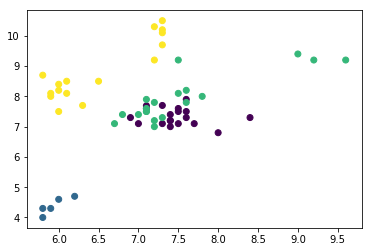

In [14]:
y = fruits['fruit_label']
X1 = fruits['width']
X2 = fruits['height']
plt.scatter(X1, X2 , c = y)
plt.show()

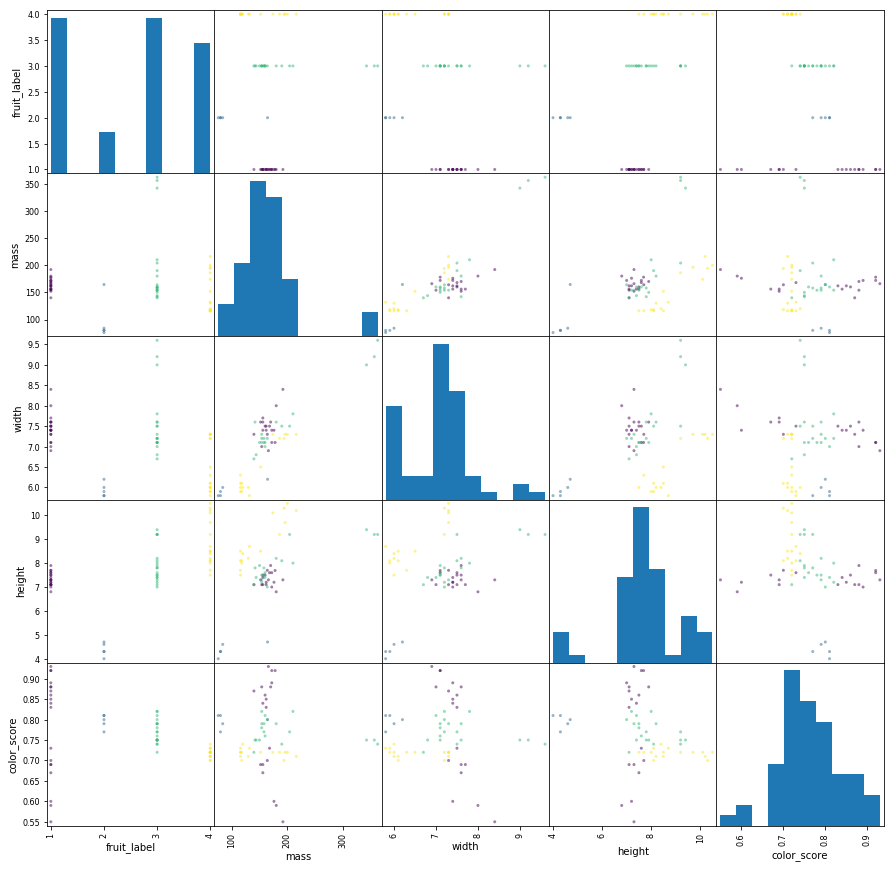

In [15]:
pd.plotting.scatter_matrix(fruits, c=y, figsize=(15,15))
plt.show()

In [16]:
X = fruits[['height','mass','width','color_score']]
y = fruits['fruit_label']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
knn.score(X_test, y_test)

0.5333333333333333

In [21]:
fruit_prediction = knn.predict([[20, 4.3, 5.5, 0.9]])
print(fruit_prediction)

[4]


In [22]:
#!pip install graphviz

In [23]:
from adspy_shared_utilities import plot_fruit_knn

C:\Users\Tales\Documents\tales\POSGRAD\MachineLearn\adspy_shared_utilities.py:184: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X_mat = X[['height', 'width']].as_matrix()
C:\Users\Tales\Documents\tales\POSGRAD\MachineLearn\adspy_shared_utilities.py:185: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_mat = y.as_matrix()


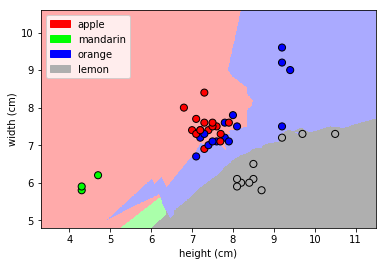

In [24]:
plot_fruit_knn(X_train, y_train, 10, 'uniform')

* Efeito de K na acurácia.

In [25]:
from sklearn.neighbors import KNeighborsClassifier

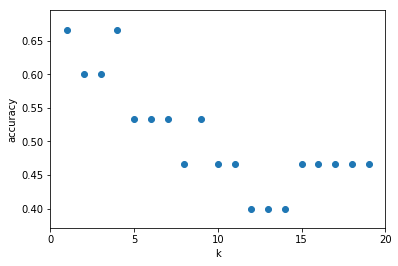

In [26]:
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

<h2>Exercício</h2>

<ul>
    <li>Visulizar os dados (escolher dois atributos)</li>
    <li>Fazer o scatterplot</li>
    <li>Classificar usando K-NN (variar distancia e k)</li>
    <li>Visualizar superfícies d decisão</li>
</ul>

In [27]:
from sklearn.datasets import load_iris

In [28]:
iris = load_iris()

In [29]:
exer = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

In [30]:
exer[['sepal length (cm)','sepal width (cm)', 'target']].head(3)

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0.0
1,4.9,3.0,0.0
2,4.7,3.2,0.0


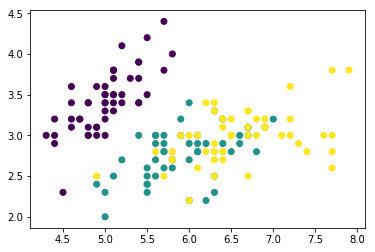

In [33]:
y = exer['target']
X1 = exer['sepal length (cm)']
X2 = exer['sepal width (cm)']
plt.scatter(X1, X2 , c = y)
plt.show()

In [34]:
X = exer[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y = exer['target']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

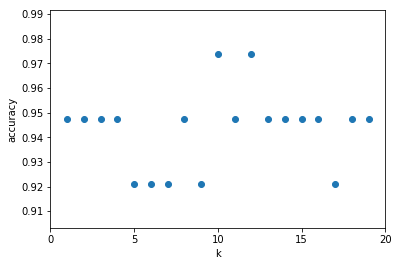

In [36]:
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()